In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import data,io, color, measure
from skimage.filters import unsharp_mask

In [34]:
filename = "microstructure.jpg"

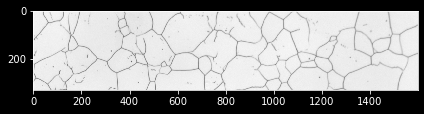

In [35]:
image = io.imread(fname=filename,as_gray=True)
image=image[0:330,:]
io.imshow(image)

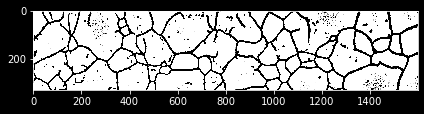

In [36]:
sharp=unsharp_mask(image,36,200)
io.imshow(sharp)

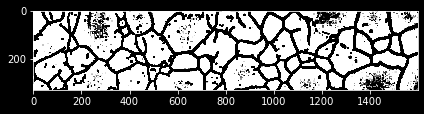

In [37]:
kernel=np.ones((3,3),np.float64)
erode=cv2.erode(sharp,kernel,iterations=2)
io.imshow(erode)

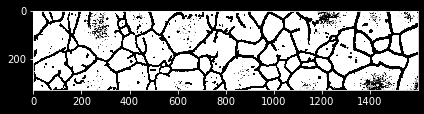

In [38]:
dilate=cv2.dilate(erode,kernel,iterations=1)
io.imshow(dilate)

In [40]:
t=0.5
mask=dilate>t
io.imshow(mask)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [41]:
io.imshow(mask[0:500,0:500])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [42]:
s=[[1,1,1],[1,1,1],[1,1,1]]
#s=[[1,0,1],[0,1,0],[1,0,1]]
labelled_mask,num_labels=ndimage.label(mask,structure=s)

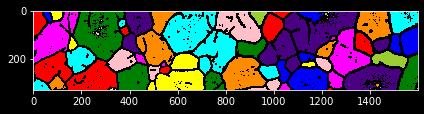

In [43]:
img2=color.label2rgb(labelled_mask,bg_label=0)
io.imshow(img2)

In [44]:
clusters=measure.regionprops(labelled_mask,image)
len(clusters)

97

In [45]:
for prop in clusters:
    print(prop.perimeter,",",prop.equivalent_diameter)

310.05382386916233 , 72.42752877400189
134.5685424949238 , 31.311251163856024
176.42640687119285 , 45.9459591821838
1276.6904755831213 , 153.97725014596625
2537.0306627407986 , 183.3607466669917
1015.4528855298854 , 119.0266206118117
394.936074863071 , 85.96442472117687
1812.035713374682 , 175.79915662299578
1095.3767670841366 , 136.73888515866972
232.36753236814715 , 58.52362237026676
210.95331880577405 , 45.4864184146723
364.75230867899734 , 59.23721959452611
12.0 , 4.370193722368317
76.72792206135786 , 14.228319915326999
32.82842712474619 , 8.593479713983122
2170.047906683502 , 176.83901282873168
986.7249634685276 , 124.62844461126943
820.889393668845 , 99.80256989909218
15.414213562373096 , 5.527906391541368
25.656854249492383 , 6.6755811781245455
321.22034611053283 , 87.8108118793816
29.414213562373092 , 7.046725639945928
14.82842712474619 , 5.292567428401227
11.414213562373096 , 4.370193722368317
16.82842712474619 , 5.4115163798060095
10.0 , 3.9088200952233594
10.0 , 3.9088200952

In [46]:
kl=[]
bl=[]
for prop in clusters:
    kl.append(prop.equivalent_diameter)
bl.append([i for i in kl if i>20])

In [47]:
mean=np.mean(bl)
print(mean)
print(mean*0.5)

81.965816452183
40.9829082260915
